<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Laborat%C3%B3rio_de_dados_de_An%C3%A1lise_de_RH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de RH Expandido

## Conteúdo do dataset

Os campos representam um conjunto de dados fictícios onde uma pesquisa foi realizada e existem métricas reais de funcionários para uma organização específica. Nenhum desses dados é real.

fonte: https://www.kaggle.com/krismurphy01/data-lab

Importando as bibliotecas que serão utilizadas para a análise exploratória do conjunto de dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
%matplotlib inline
py.offline.init_notebook_mode(connected=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Processo_Seletivo_Data _Science/HR_Engagement_Sat_Sales_UpdatedV4.0.csv")

In [4]:
df.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


Visualizando as colunas do dataset para identificar os tipos de dados e se há valores nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 62 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ID                                     14999 non-null  int64  
 1   Name                                   14997 non-null  object 
 2   Department                             14999 non-null  object 
 3   GEO                                    14999 non-null  object 
 4   Role                                   14999 non-null  object 
 5   Rising_Star                            21 non-null     float64
 6   Will_Relocate                          14999 non-null  int64  
 7   Critical                               480 non-null    float64
 8   Trending Perf                          14999 non-null  int64  
 9   Talent_Level                           14999 non-null  int64  
 10  Validated_Talent_Level                 14999 non-null  int64  
 11  Pe

Aqui verificamos a quantidade de linhas e colunas que o dataset possui

In [6]:
df.shape

(14999, 62)

Verificando a distribuição dos valores de salário, departamentos e grupo de vendas

In [7]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [8]:
df.Department.value_counts()

Finance            2500
Sales              2500
Human Resources    2500
IT                 2500
Operations         2500
Warehouse          2499
Name: Department, dtype: int64

In [9]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Verificando a quantidade de valores nulos em cada coluna

In [10]:
df.isnull().sum()

ID                                       0
Name                                     2
Department                               0
GEO                                      0
Role                                     0
                                        ..
Emp_Collaborative_4                      0
Emp_Collaborative_5                      0
Sensor_StepCount                         0
Sensor_Heartbeat(Average/Min)            0
Sensor_Proximity(1-highest/10-lowest)    0
Length: 62, dtype: int64

Aqui veremos de forma gráfica através de um histograma a distribuição dos valores de cada coluna numérica para que fique mais claro como os dados estão distribuídos

In [2]:
plt.rcParams["figure.figsize"] = [22, 18]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d6c0ae240>,
      dtype=object)

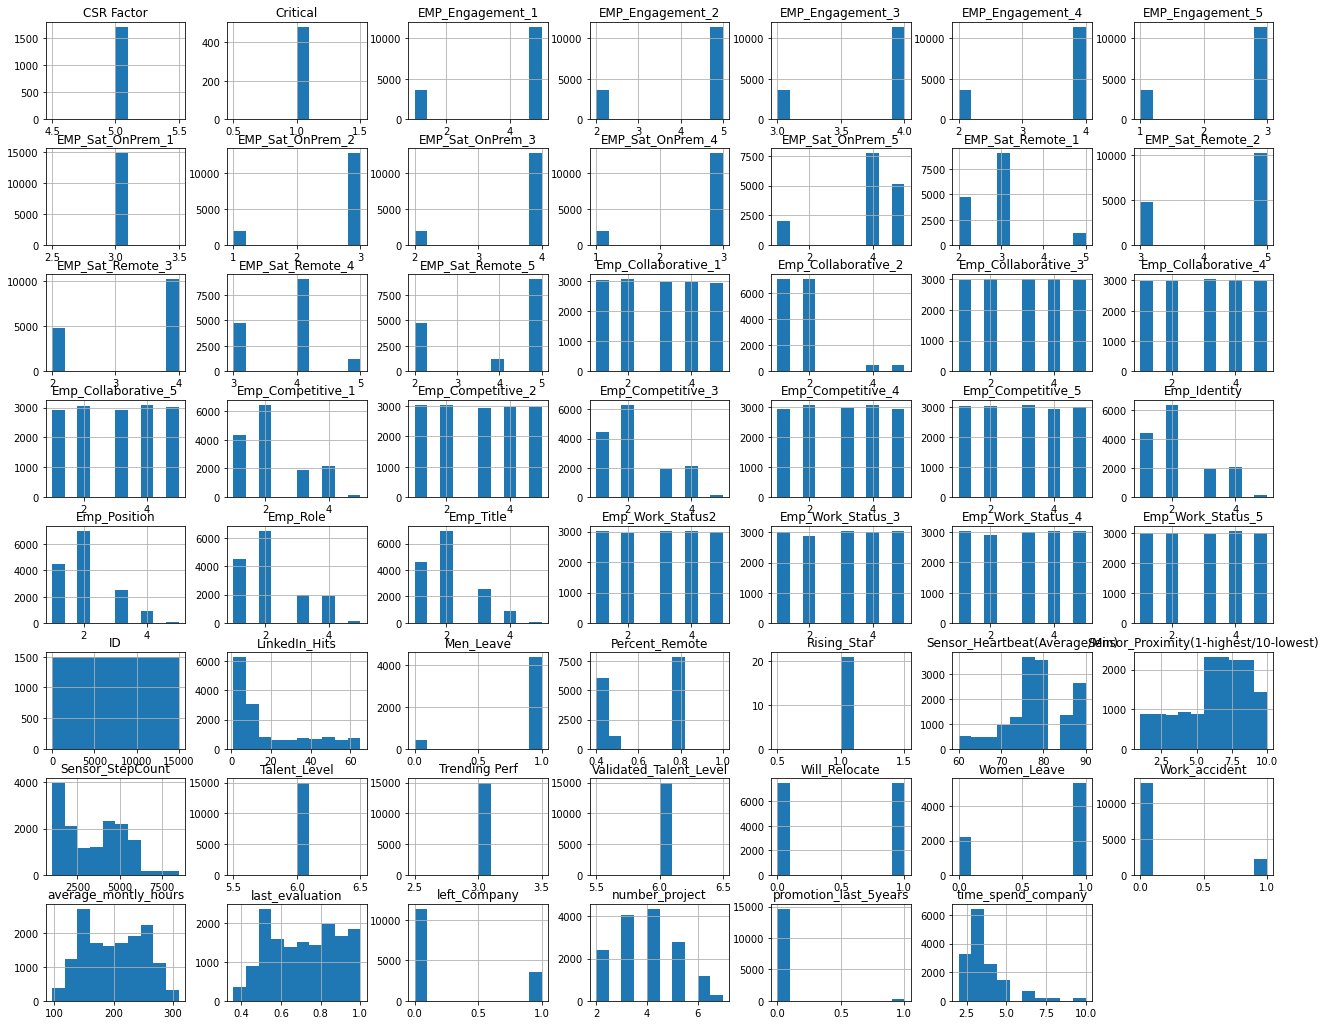

In [11]:
df.hist(bins=10)

Algumas colunas tem uma quantidade muito grande de valores nulos(Rising_Star, Critical, CSR Factor, Women_Leave, Men_Leave), e outras colunas tem valores únicos (Talent_Level, Validated_Talent_Level, Trending Perf)dessa forma vamos retirá-las para que não interfiram negativamente no treinamento do modelo.

In [12]:
df2 = df.drop(["Rising_Star", "Critical", "CSR Factor", "Women_Leave", "Men_Leave", "Talent_Level", "Validated_Talent_Level", "Trending Perf"], axis=1)

In [13]:
df2.head()

,ID,Name,Department,GEO,Role,Will_Relocate,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


Agora que algumas colunas foram retiradas, iremos verificar uma descrição completa sobre as colunas que restaram

In [14]:
df.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,6.0,0.617321,3.0,2.731962,3.731962,2.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,6.0,0.400000,3.0,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,6.0,0.800000,3.0,3.000000,4.000000,3.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,6

In [15]:
df2.shape

(14999, 54)

Aqui veremos o exemplo de distribuição de algumas colunas como a média de horas trabalhadas por mês, a quantidade de projetos em que a pessoa participou durante o ano e o percentual de trabalho remoto.

In [16]:
plt.style.use("fivethirtyeight")

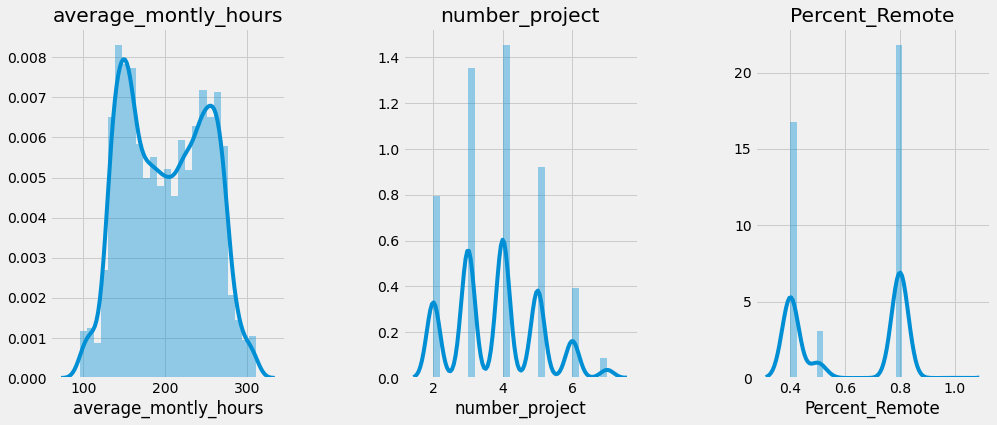

In [17]:
plt.figure(1, figsize=(15, 6))
n = 0
for x in ["average_montly_hours", "number_project", "Percent_Remote"]:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df2[x], bins=25)
  plt.title(f"{x}")
plt.show()

In [19]:
df2.Percent_Remote.value_counts()

0.8    7853
0.4    6022
0.5    1112
1.0      12
Name: Percent_Remote, dtype: int64

In [20]:
#sns.pairplot(df2)

Carregando somente as variaveis que irão treinar o modelo

In [21]:
X = df.drop(["ID", "Name", "Rising_Star", "Critical", "CSR Factor", "Talent_Level", "Validated_Talent_Level", "Trending Perf"], axis=1)

Como ainda existem algumas variáveis com muitos valores nulos, ao invés de exclui-los, iremos substituir por 0

In [22]:
X = X.fillna(0)

In [ ]:
X.info()

Para o treinamento do modelo é importante que o dataset possua apenas dados numéricos, porém há algumas colunas que estão tipadas como objetos, portanto iremos transformá-los em dados categóricos

In [24]:
X.sales = X.sales.astype("category")
X.salary = X.salary.astype("category")
X.Gender = X.Gender.astype("category")
X.Department = X.Department.astype("category")
X.GEO = X.GEO.astype("category")
X.Role = X.Role.astype("category")

In [ ]:
X.info()

E agora após transformados em categóricos, iremos transformá-los em numéricos usando a função Label Encoder do pacote Scikit-Learn

In [26]:
from sklearn import preprocessing

In [27]:
label1 = preprocessing.LabelEncoder()
label2 = preprocessing.LabelEncoder()
label3 = preprocessing.LabelEncoder()
label4 = preprocessing.LabelEncoder()
label5 = preprocessing.LabelEncoder()
label6 = preprocessing.LabelEncoder()

In [28]:
X.sales = label1.fit_transform(X.sales)
X.salary = label2.fit_transform(X.salary)
X.Gender = label3.fit_transform(X.Gender)
X.Department = label4.fit_transform(X.Department)
X.GEO = label5.fit_transform(X.GEO)
X.Role = label6.fit_transform(X.Role)

Como os dados não estão rotulados, iremos utilizar o algoritmo KMeans para tentar agrupá-los, de forma a encontrar padrões entre as observações

In [29]:
from sklearn.cluster import KMeans

Devido ao fato de não sabermos quantos grupos este dataset pode ser dividido, utilizaremos o método Elbow, que consiste em uma técnica que testa a variância dos dados em relação ao número de clusters (grupos). Sendo assim, um valor é considerado ideal quando o aumento no número de clusters não representa um valor significativo de ganho.

In [30]:
X2 = X.iloc[: , :].values
inertia = []
for n in range(1, 11):
  algorithm = (KMeans(n_clusters = n))
  algorithm.fit(X2)
  inertia.append(algorithm.inertia_)

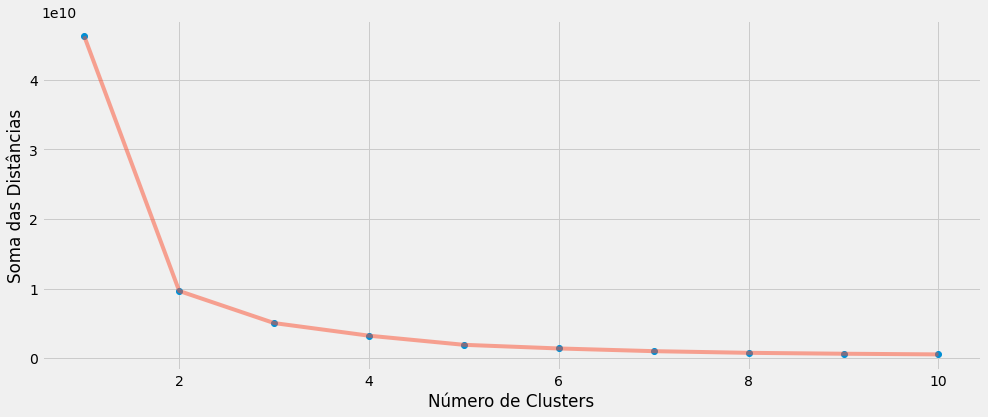

In [96]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias')
plt.show()

Olhando o gráfico acima percebemos que a partir do número 3 clusters as distâncias dos erros quadráticos se estabiliza, dessa forma iremos utilizar 3 clusters.

In [97]:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Agora que o algoritimo foi treinado, iremos incluir uma coluna no dataset com a informação do grupo a qual cada registro pertence: 0, 1 ou 2.

In [98]:
df2["clusters"] = algorithm.labels_

Verificando as 5 primeiras linhas para visualizar o resultado do agrupamento

In [99]:
df2.head()

,ID,Name,Department,GEO,Role,Will_Relocate,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),clusters
0,1,BRADDY,Operations,US,VP,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9,0
1,2,BORST,Sales,UK,Senior Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8,0
2,3,BIRDWELL,Finance,France,Senior Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8,2
3,4,BENT,Human Resources,China,Senior Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6,2
4,5,BAZAN,IT,Korea,Director,0,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10,2


Aqui vemos como foi distribuído entre as classes

In [100]:
df2.clusters.value_counts()

0    6658
2    4374
1    3967
Name: clusters, dtype: int64

Criando um novo dataset agrupado pelos clusters para podermos visualizar as características de cada grupo em relação a cada coluna

In [101]:
df_group = df2.groupby("clusters")

In [102]:
from IPython.display import display

pd.options.display.max_columns = None
display(df_group.describe())

ID                                                              \
           count         mean          std    min      25%     50%       75%   
clusters                                                                       
0         6658.0  5966.080354  4308.638141    1.0  2528.25  4973.5   9536.75   
1         3967.0  9595.928914  3690.870935  450.0  7957.50  9925.0  12444.50   
2         4374.0  7933.993370  3991.404622    3.0  4923.00  7952.5  11277.25   

                  Will_Relocate                                               \
              max         count      mean       std  min  25%  50%  75%  max   
clusters                                                                       
0         14999.0        6658.0  0.494743  0.500010  0.0  0.0  0.0  1.0  1.0   
1         14963.0        3967.0  0.508445  0.499992  0.0  0.0  1.0  1.0  1.0   
2         14964.0        4374.0  0.499771  0.500057  0.0  0.0  0.0  1.0  1.0   

         Percent_Remote                                               \
                  count      mean       std  min  25%  50%  75%  max   
clusters                                                               
0                6658.0  0.525939  0.177243  0.4  0.4  0.4  0.8  1.0   
1                3967.0  0.745752  0.136971  0.4  0.8  0.8  0.8  0.8   
2                4374.0  0.639941  0.189317  0.4  0.4  0.8  0.8  0.8   

         EMP_Sat_OnPrem_1                                    EMP_Sat_OnPrem_2  \
                    count mean  std  min  25%  50%  75%  max            count   
clusters                                                                        
0                  6585.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0           6585.0   
1                  3938.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0           3938.0   
2                  4348.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0           4348.0   

                                                      EMP_Sat_OnPrem_3  \
              mean       std  min  25%  50%  75%  max            count   
clusters                                                                 
0         2.602733  0.798003  1.0  3.0  3.0  3.0  3.0           6585.0   
1         3.000000  0.000000  3.0  3.0  3.0  3.0  3.0           3938.0   
2         2.684913  0.728709  1.0  3.0  3.0  3.0  3.0           4348.0   

                                                      EMP_Sat_OnPrem_4  \
              mean       std  min  25%  50%  75%  max            count   
clusters                                                                 
0         3.602733  0.798003  2.0  4.0  4.0  4.0  4.0           6585.0   
1         4.000000  0.000000  4.0  4.0  4.0  4.0  4.0           3938.0   
2         3.684913  0.728709  2.0  4.0  4.0  4.0  4.0           4348.0   

                                                      EMP_Sat_OnPrem_5  \
              mean       std  min  25%  50%  75%  max            count   
clusters                                                                 
0         2.602733  0.798003  1.0  3.0  3.0  3.0  3.0           6585.0   
1         3.000000  0.000000  3.0  3.0  3.0  3.0  3.0           3938.0   
2         2.684913  0.728709  1.0  3.0  3.0  3.0  3.0           4348.0   

                                                      EMP_Sat_Remote_1  \
              mean       std  min  25%  50%  75%  max            count   
clusters                                                                 
0         3.927107  1.518467  1.0  4.0  5.0  5.0  5.0           6658.0   
1         4.136618  0.343487  4.0  4.0  4.0  4.0  5.0           3967.0   
2         3.793928  1.281548  1.0  4.0  4.0  5.0  5.0           4374.0   

                                                      EMP_Sat_Remote_2  \
              mean       std  min  25%  50%  75%  max            count   
clusters                                                                 
0         2.645689  0.770024  2.0  2.0  3.0  3.0  5.0           6658.0   
1         3.085203  0.755081  2.0  3.0  3.0  3.0  5.0   

Dentre algumas das variáveis, podemos ver algumas informações como média, desvio padrão, mediana (50%) e os quartis de cada grupo.

In [81]:
df_group.average_montly_hours.describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,4374.0,213.065386,40.758219,96.0,186.0,215.0,246.0,287.0
1,6658.0,196.863022,55.793398,96.0,149.0,180.0,249.0,310.0
2,3967.0,194.830350,46.351751,96.0,153.0,193.0,237.0,287.0


In [82]:
df_group.Gender.describe()

,count,unique,top,freq
clusters,,,,
0,4374,2,M,2198
1,6658,2,F,3389
2,3967,2,F,2031


In [83]:
df_group.time_spend_company.describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,4374.0,3.381802,1.579250,2.0,2.0,3.0,4.0,10.0
1,6658.0,3.681586,1.364751,2.0,3.0,3.0,4.0,10.0
2,3967.0,3.318881,1.443124,2.0,3.0,3.0,4.0,10.0


In [84]:
df_group.number_project.describe()

,count,mean,std,min,25%,50%,75%,max
clusters,,,,,,,,
0,4374.0,3.808185,0.978393,2.0,3.0,4.0,4.0,6.0
1,6658.0,3.934214,1.433792,2.0,3.0,4.0,5.0,7.0
2,3967.0,3.577262,1.076741,2.0,3.0,4.0,4.0,6.0


# Conclusão:

Este conjunto de dados demanda uma análise mais profunda sobre suas características para que possa se chegar a um resposta precisa para o questionanto proposto, que seria o por que dos melhores profissionais e mais experientes deixarem a empresa de forma prematura, porém já temos algumas características de três grupos distintos. Dessa forma, precisaremos de mais tempo e de mais treinamento afim de definir qual é o perfil deste colaborador que sai da empresa, o que está caminhando para uma demissão e os que desejam continuar trabalhando na empresa.